# Analysis of multiple repertoires

In this notebook we perform analysis of multiple BCR repertoires, fetched according to `/data/sources/immune-repertoires-dash/config.yml`. We call this multi-sample analysis and results from multi-sample analysis are used and displayed in the `immune-repertoires-dashboard`. We also may leverage immunarch in this notebook to provide some single-sample analysis results.

The requirement of a separate notebook stemms from the required R environment to run this analysis.

In [1]:
require("immunarch")

Loading required package: immunarch

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: dtplyr

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: patchwork



In [2]:
config = yaml::read_yaml("/data/sources/immune-repertoires-dash/config.yml")
samples = names(config$samples)

Warning message in readLines(file):
“incomplete final line found on '/data/sources/immune-repertoires-dash/config.yml'”


In [3]:
paths = c()

for (sample in samples) {
    rep_path = paste0(
        config$samples[[sample]]$sample_path,
        "/clones/",
        sample,
        "_novj_with_clones.tsv"
    )
    paths = c(paths, rep_path)
}

print(paths)

[1] "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_heavy/clones/S3987Nr1-PBMC1_heavy_novj_with_clones.tsv"
[2] "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_light/clones/S3987Nr1-PBMC1_light_novj_with_clones.tsv"
[3] "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_heavy/clones/S3987Nr2-PBMC1_heavy_novj_with_clones.tsv"
[4] "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_light/clones/S3987Nr2-PBMC1_light_novj_with_clones.tsv"
[5] "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-N2_IgG1Fc_H/clones/S5205Nr1-N2_IgG1Fc_H_novj_with_clones.tsv"
[6] "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P1_IgG1Fc_H/clones/S5205Nr1-P1_IgG1Fc_H_novj_with_clones.tsv"
[7] "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P2_IgG1Fc_H/clones/S5205Nr1-P2_IgG1Fc_H_novj_with_clones.tsv"
[8] "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P2_PBMC_H/clones/S5205Nr1-P2_PBMC_H_novj_with_clones.tsv"    
[9] "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P2_PBMC_L/clones/S5205Nr1-P2_PBMC_L_novj_with

In [4]:
repertoires = repLoad(.path = paths)


== Step 1/3: loading repertoire files... ==


Processing "<initial>" ...

  -- [1/9] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_heavy/clones/S3987Nr1-PBMC1_heavy_novj_with_clones.tsv" -- 
airr

  -- [2/9] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr1/S3987Nr1-PBMC1_light/clones/S3987Nr1-PBMC1_light_novj_with_clones.tsv" -- 
airr

  -- [3/9] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_heavy/clones/S3987Nr2-PBMC1_heavy_novj_with_clones.tsv" -- 
airr

  -- [4/9] Parsing "/data/samples/AIRR-Seq/OURS/S3987Nr2/S3987Nr2-PBMC1_light/clones/S3987Nr2-PBMC1_light_novj_with_clones.tsv" -- 
airr

  -- [5/9] Parsing "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-N2_IgG1Fc_H/clones/S5205Nr1-N2_IgG1Fc_H_novj_with_clones.tsv" -- 
airr

  -- [6/9] Parsing "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P1_IgG1Fc_H/clones/S5205Nr1-P1_IgG1Fc_H_novj_with_clones.tsv" -- 
airr

  -- [7/9] Parsing "/data/samples/AIRR-Seq/OURS/S5205Nr1/S5205Nr1-P2_IgG1Fc_H/clones/S5205Nr1-P2_

Exploratory analysis

In [5]:
options(repr.plot.width=15, repr.plot.height=8)  # Good size for ggplot2 in jupyter

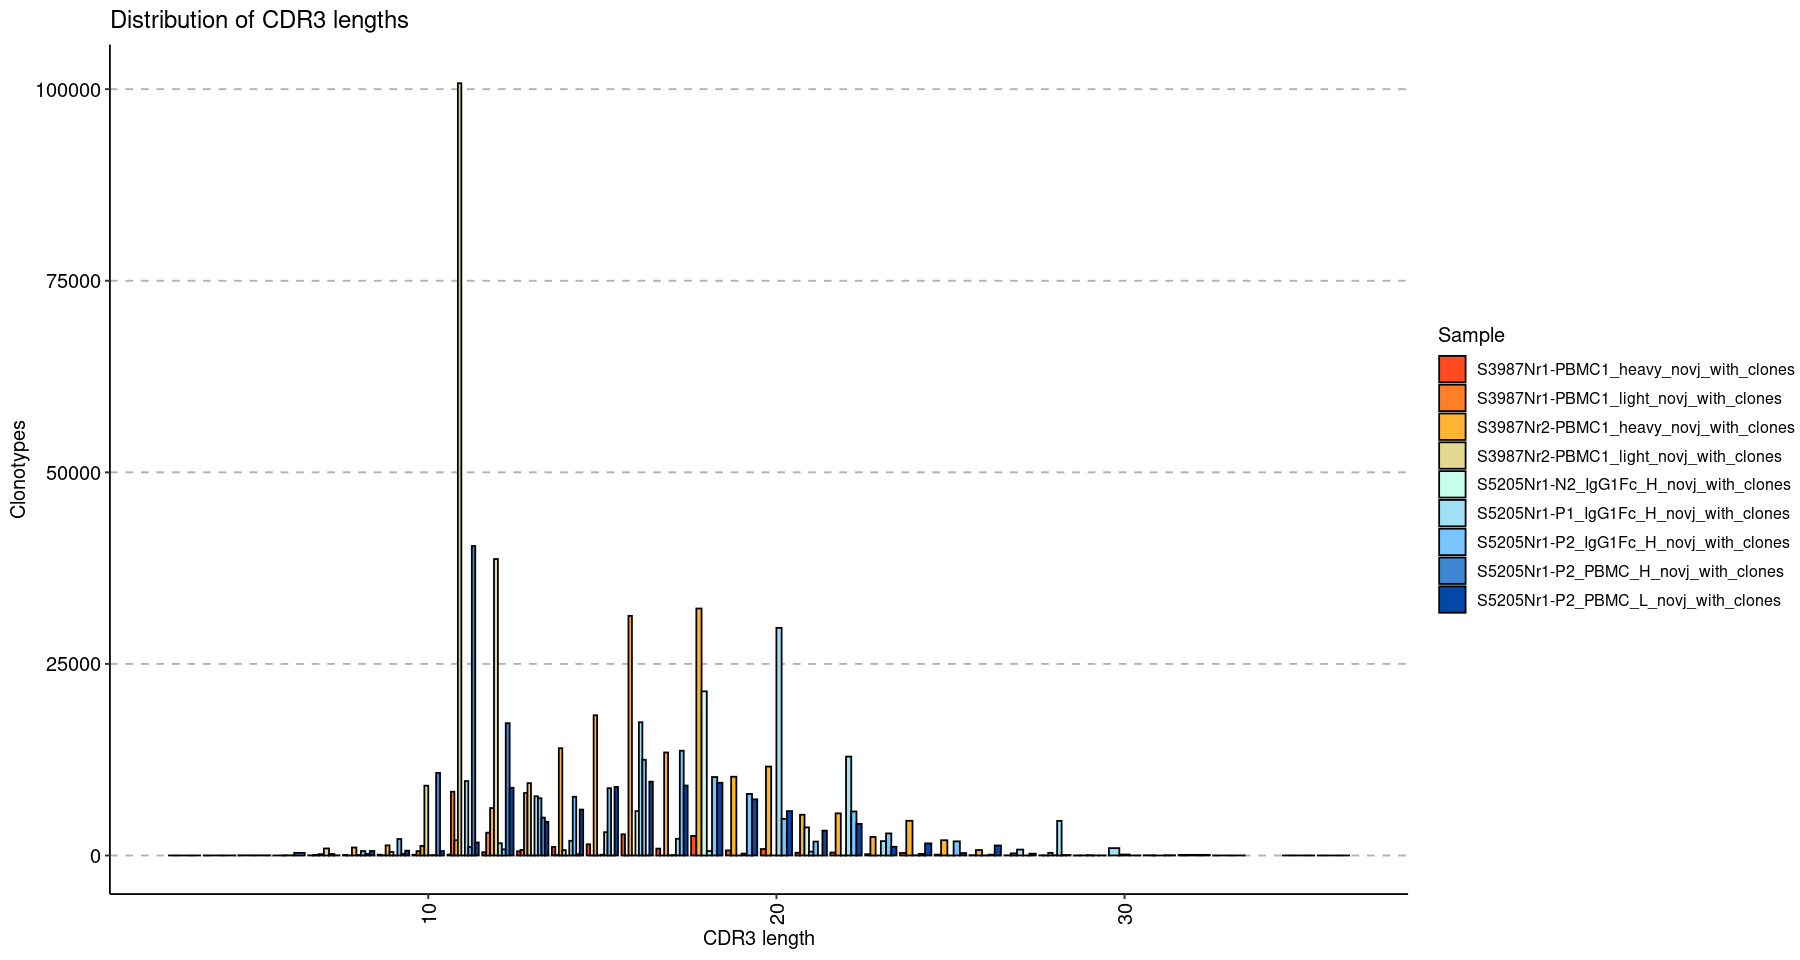

In [6]:
explorer_vol = repExplore(repertoires$data, .method = "volume")
explorer_len = repExplore(repertoires$data, .method = "len", .col = "aa")
explorer_cnt = repExplore(repertoires$data, .method = "count")

p1 = vis(explorer_vol)
p2 = vis(explorer_len)
p3 = vis(explorer_cnt)

p2

In [7]:
save_plot_to_png = function(ggplot, fp) {
    png(filename=fp, width=1200, height=600)
    ggplot
    print(ggplot)
    dev.off()   
}

save_plot_to_png(p3, "test.png")

png 
  2

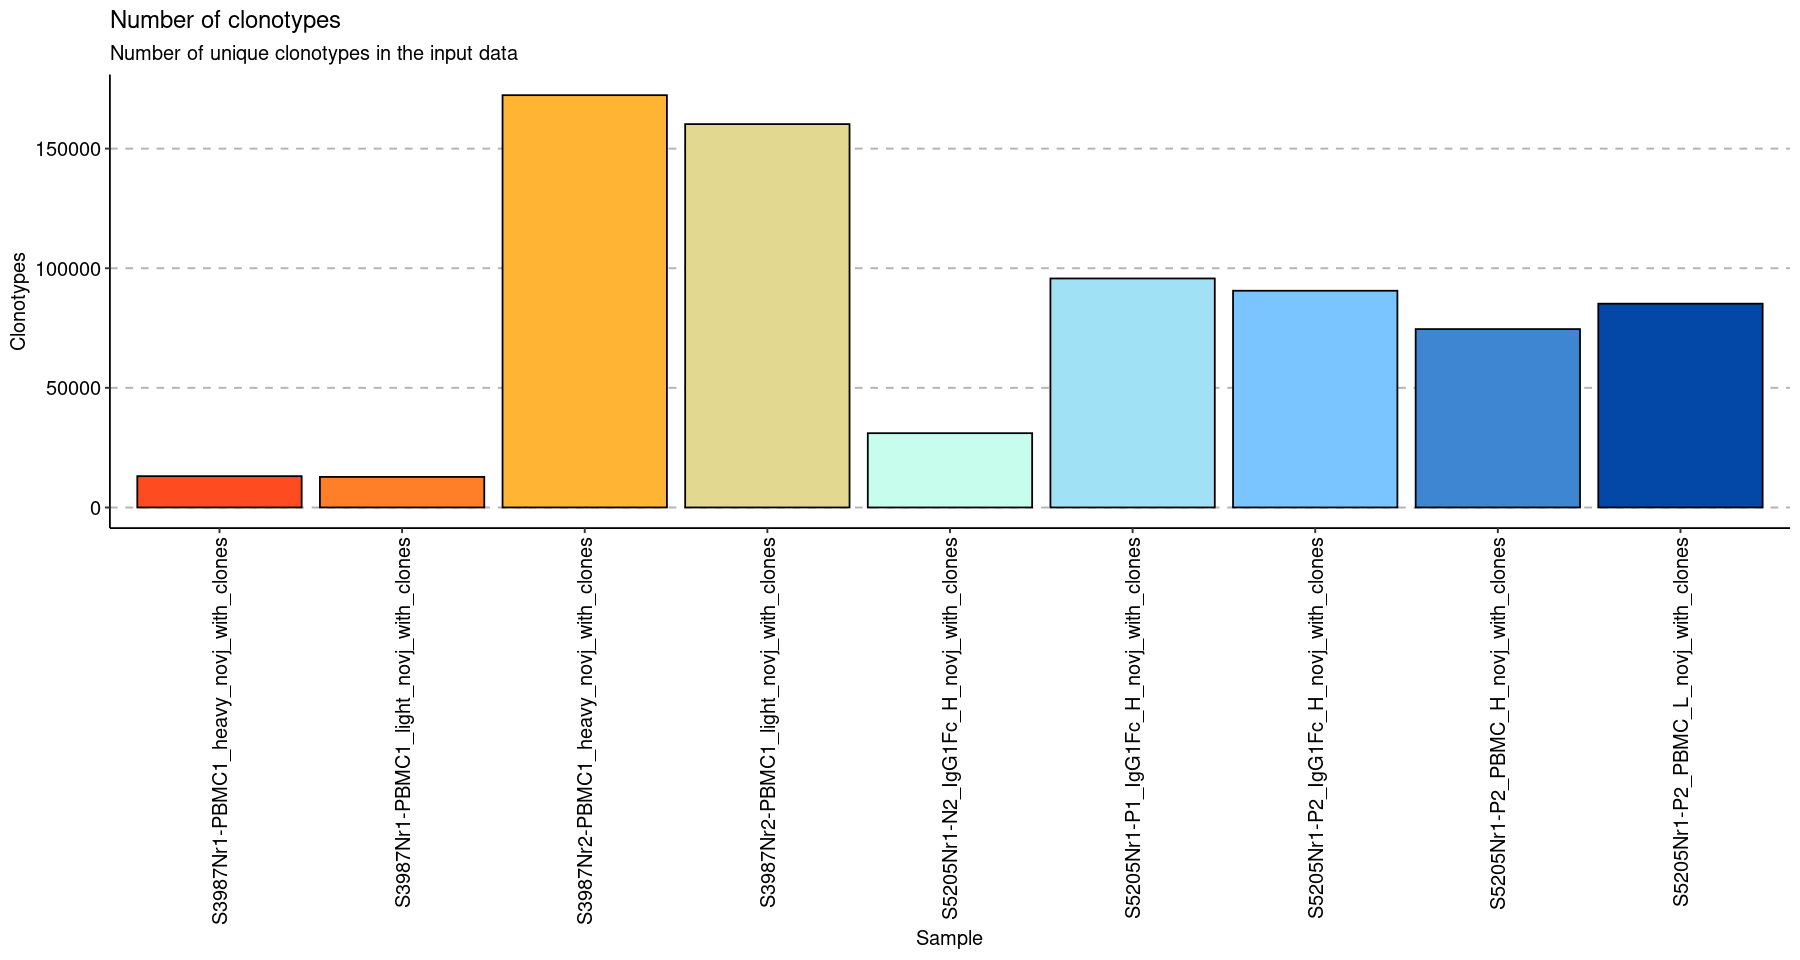

In [8]:
p1

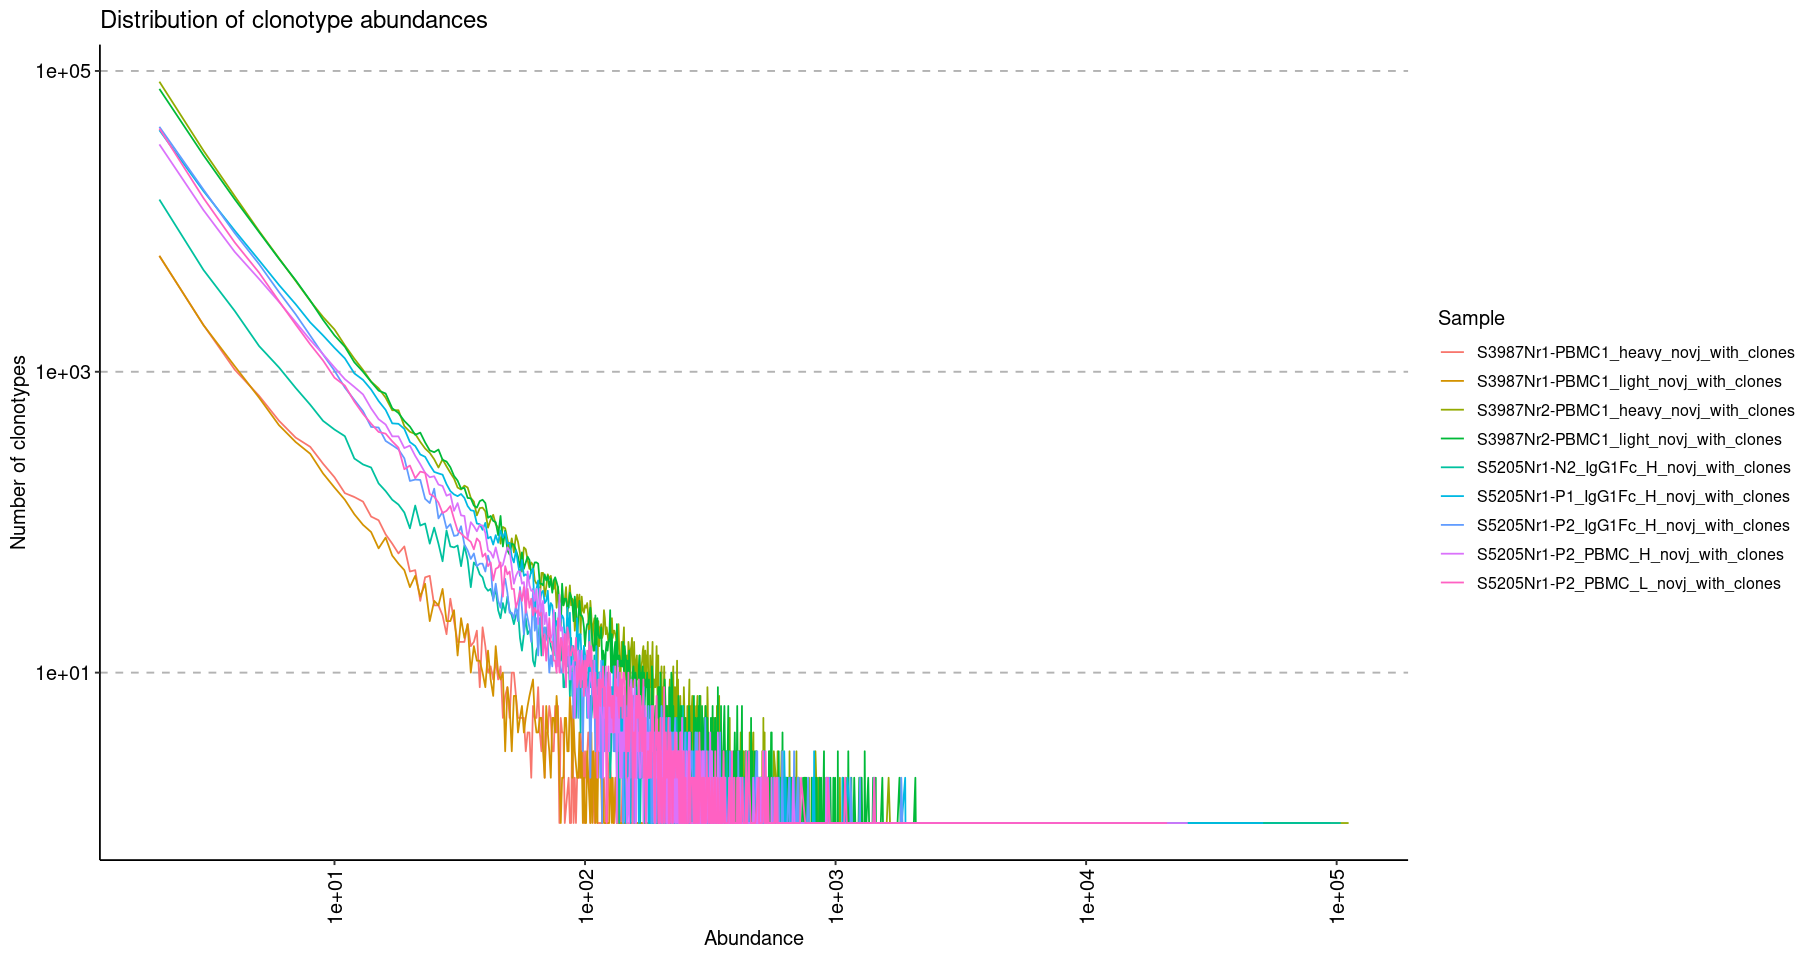

In [9]:
p3

Clonality

In [10]:
imm_pr <- repClonality(
    repertoires$data, 
    .method = "clonal.prop"
)
imm_top <- repClonality(
    repertoires$data, 
    .method = "top", 
    .head = c(10, 100, 1000, 3000, 10000)
)
imm_rare <- repClonality(
    repertoires$data, 
    .method = "rare"
)
imm_hom <- repClonality(
    repertoires$data,
    .method = "homeo",
    .clone.types = c(
        Small = .0001, 
        Medium = .001, 
        Large = .01, 
        Hyperexpanded = 1
    )
)

Using Sample as id variables



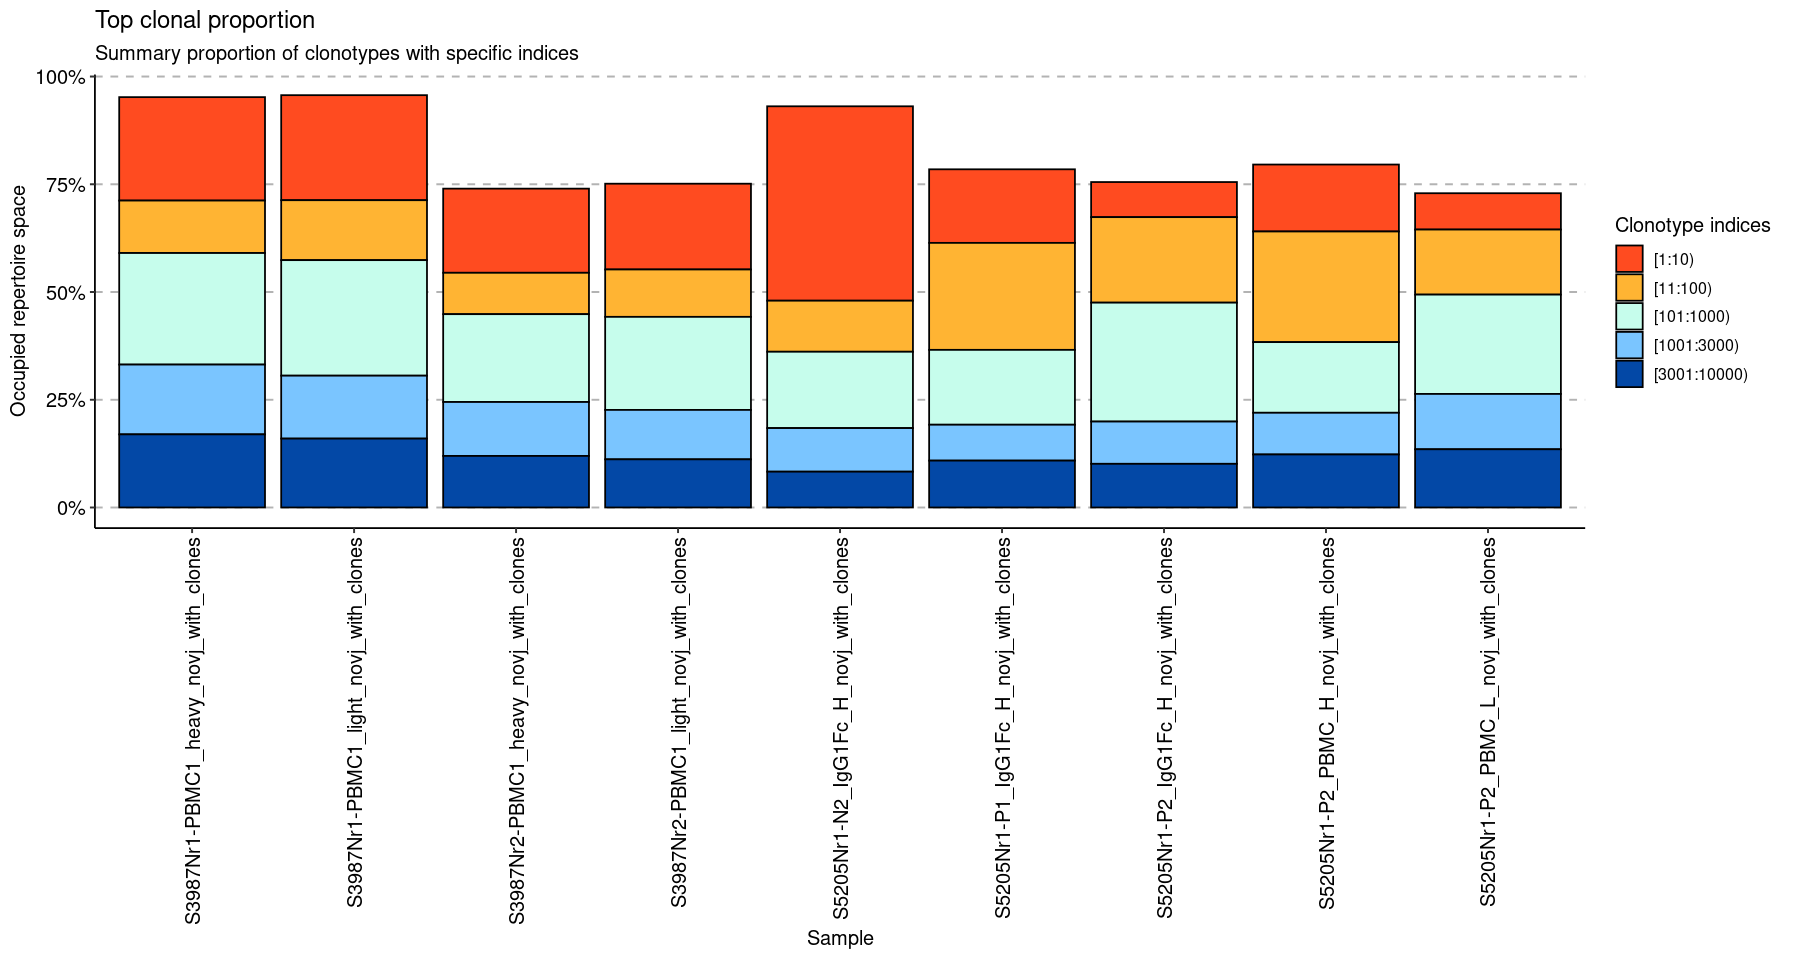

In [11]:
vis(imm_top)# + vis(imm_top, .by = "Status", .meta = immdata$meta)

Using Sample as id variables



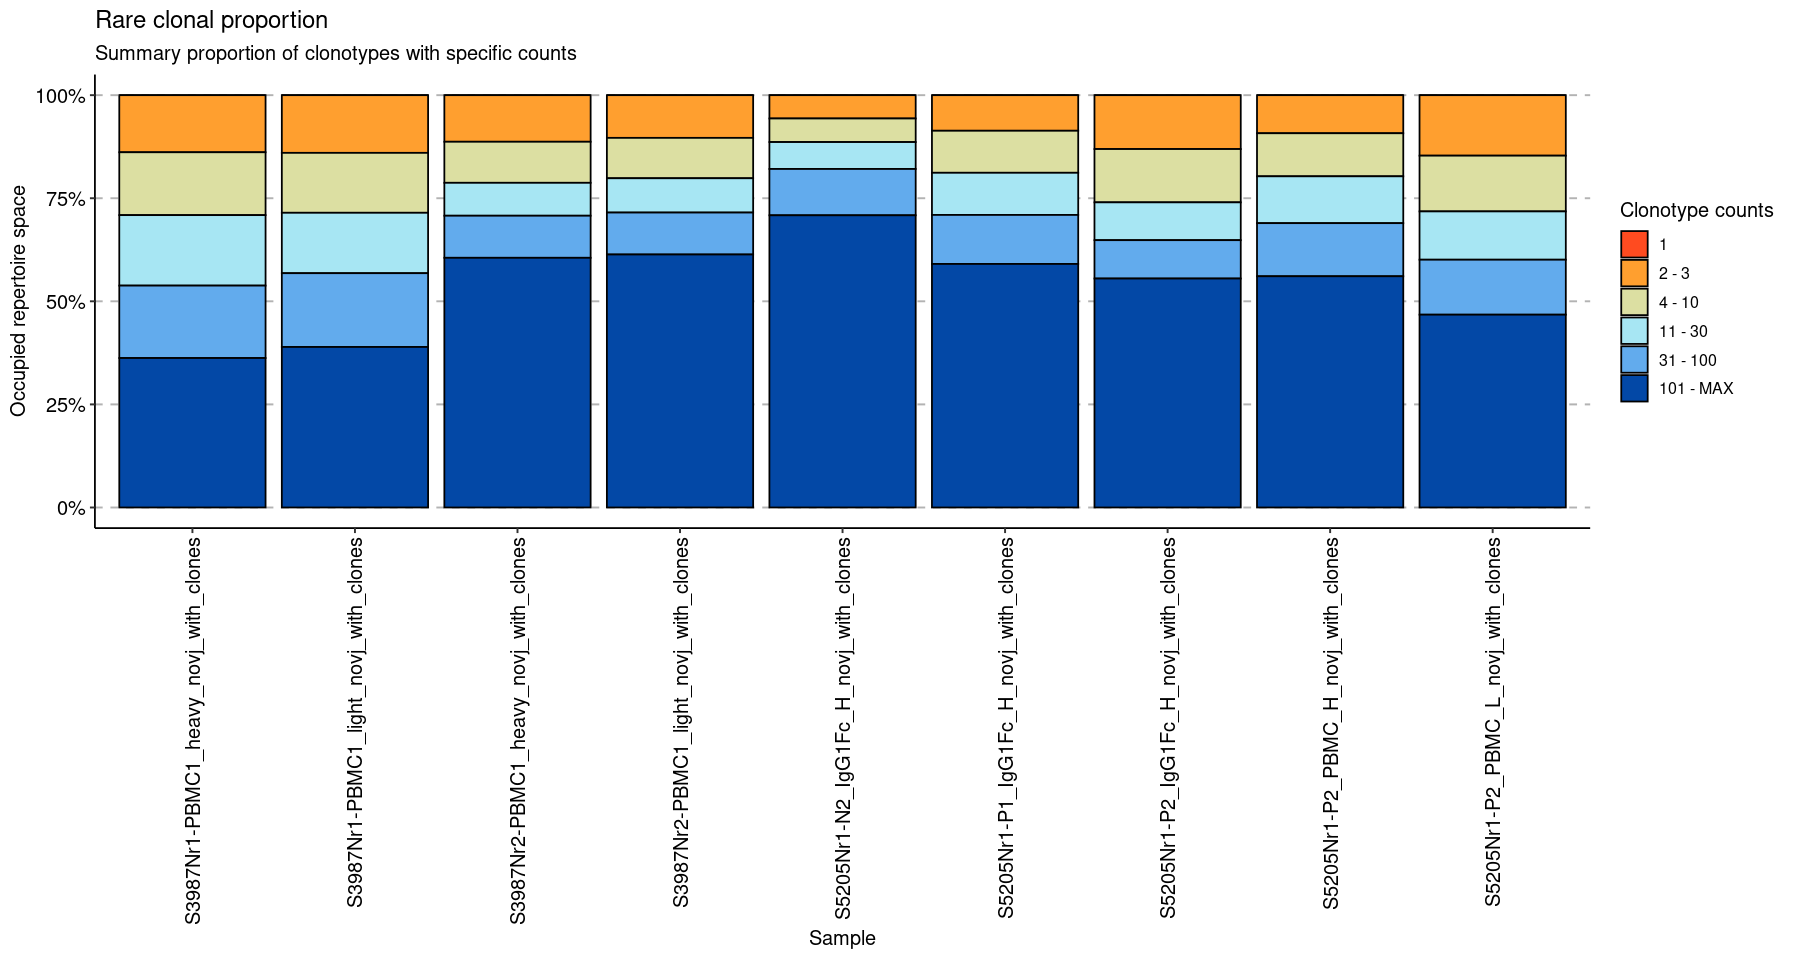

In [12]:
vis(imm_rare)# + vis(imm_rare, .by = "Status", .meta = immdata$meta)

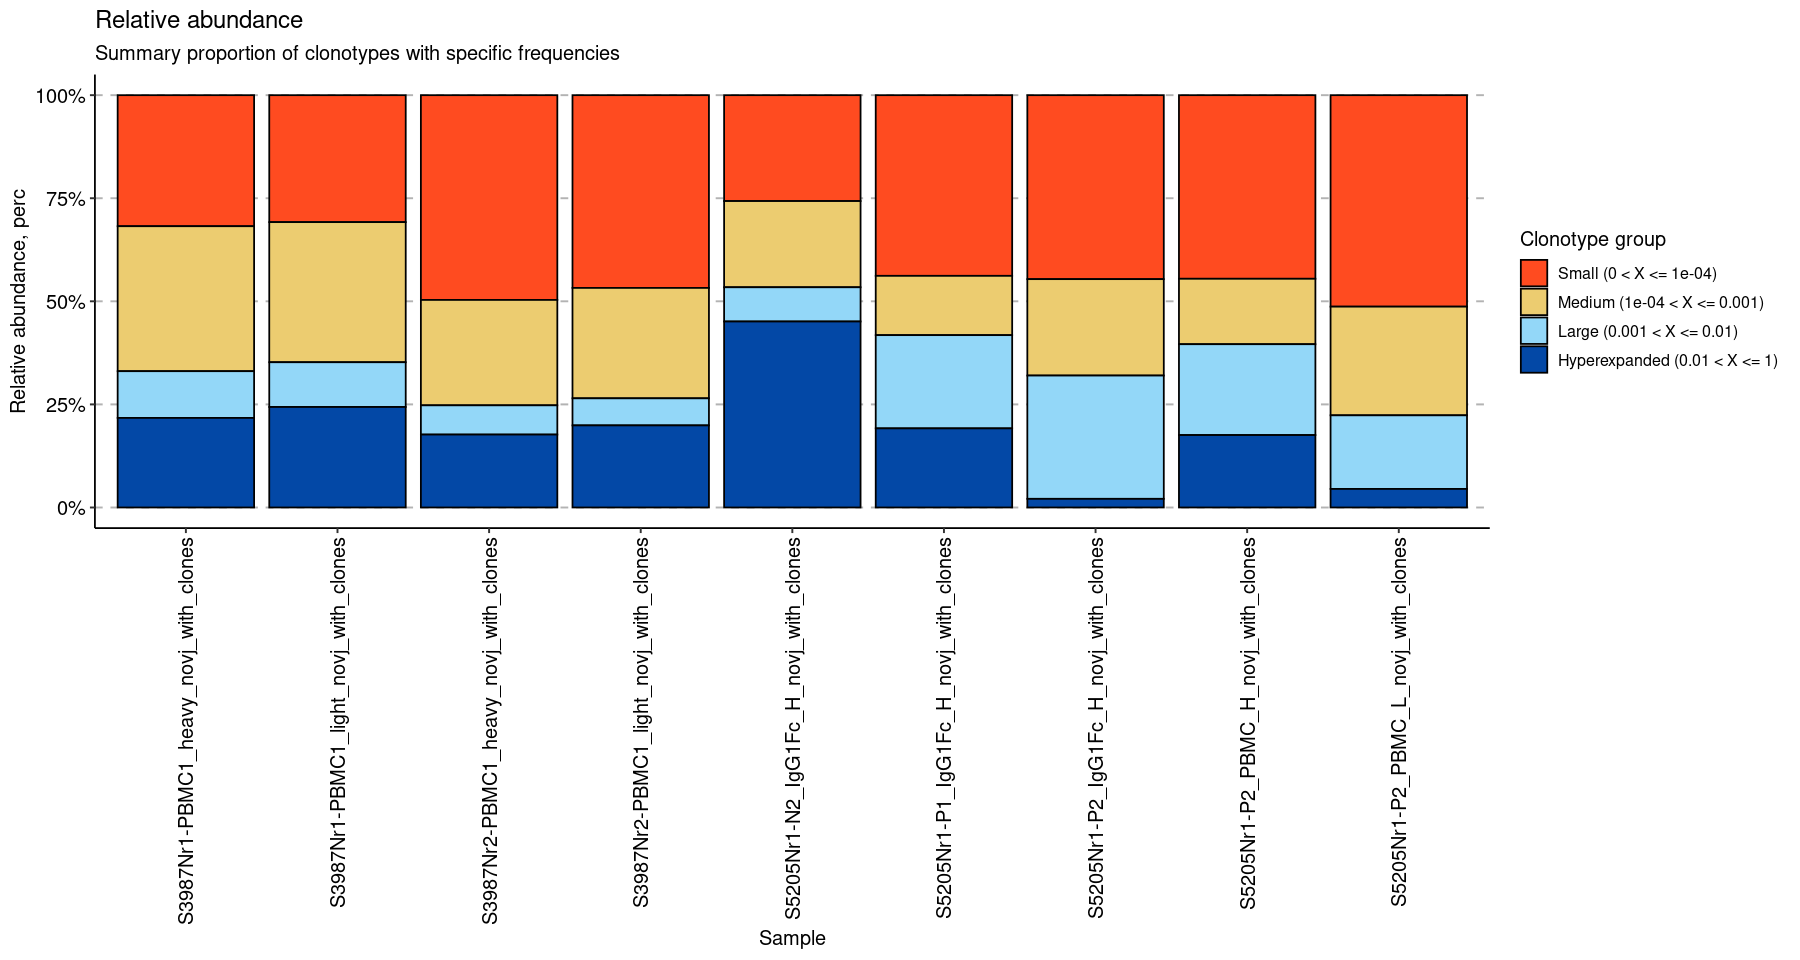

In [13]:
vis(imm_hom)# + vis(imm_hom, .by = c("Status", "Sex"), .meta = immdata$meta)

Repertoire overlaps and public repertoires

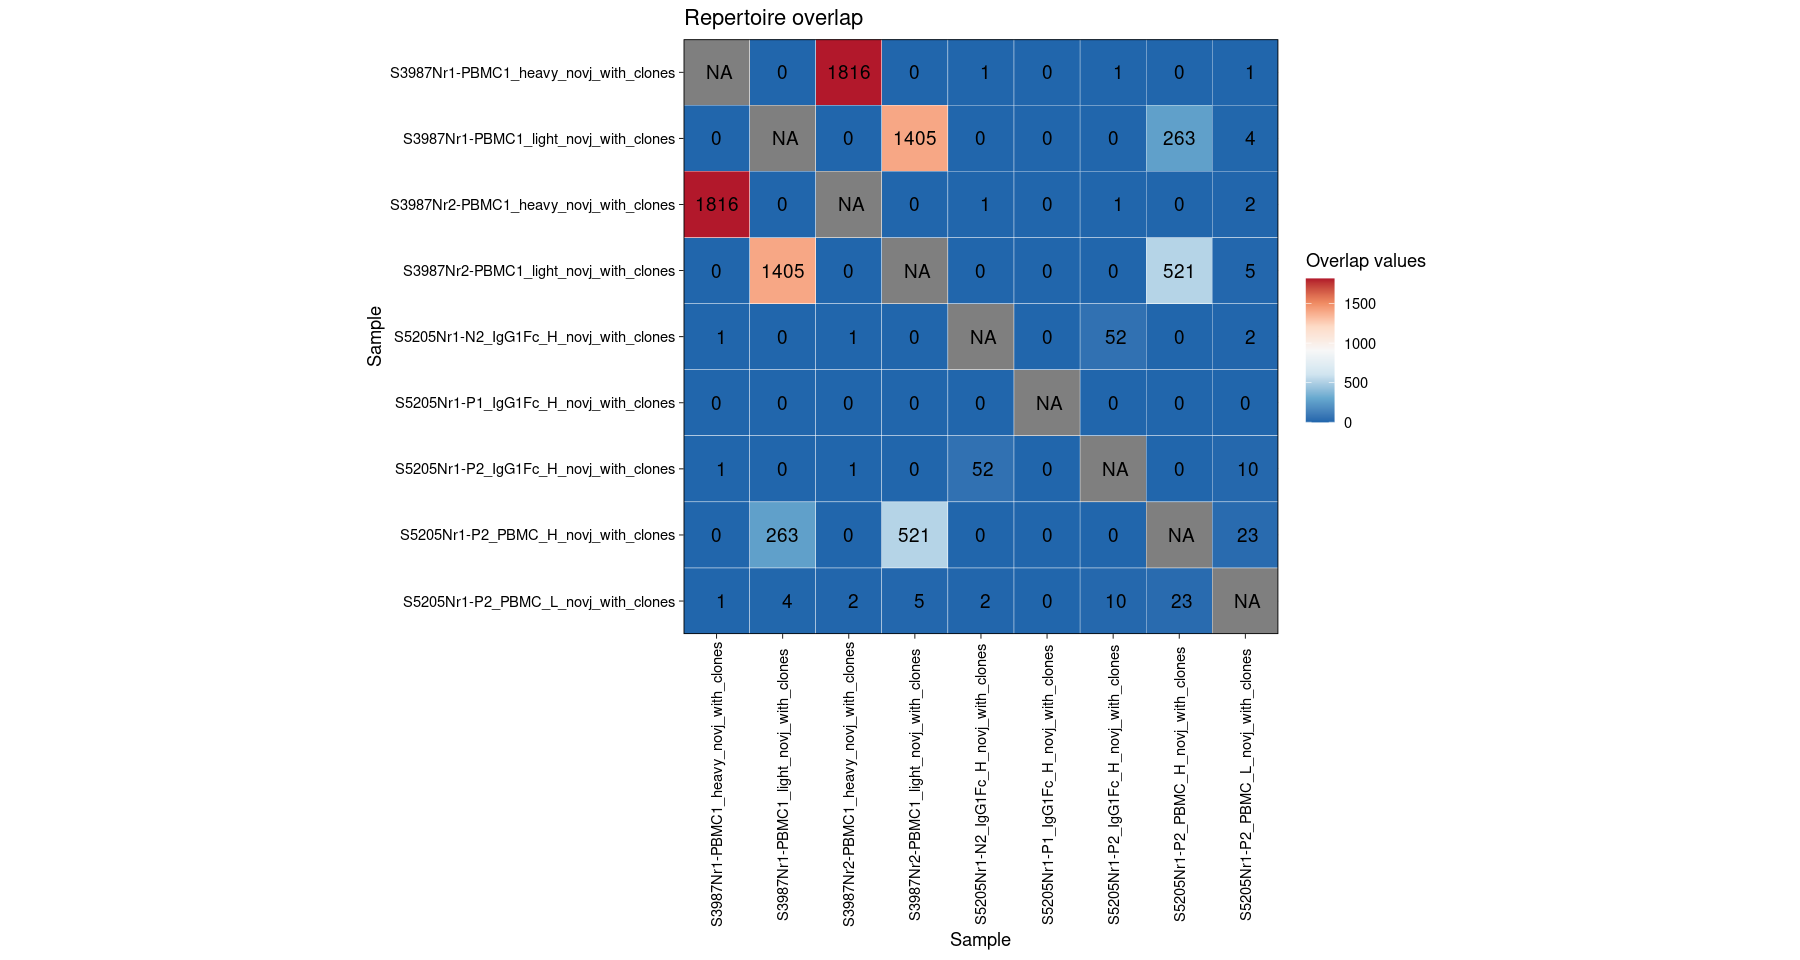

In [14]:
imm_ov1 <- repOverlap(repertoires$data, .method = "public", .verbose = F)
p1 <- vis(imm_ov1)

p1

Diversity

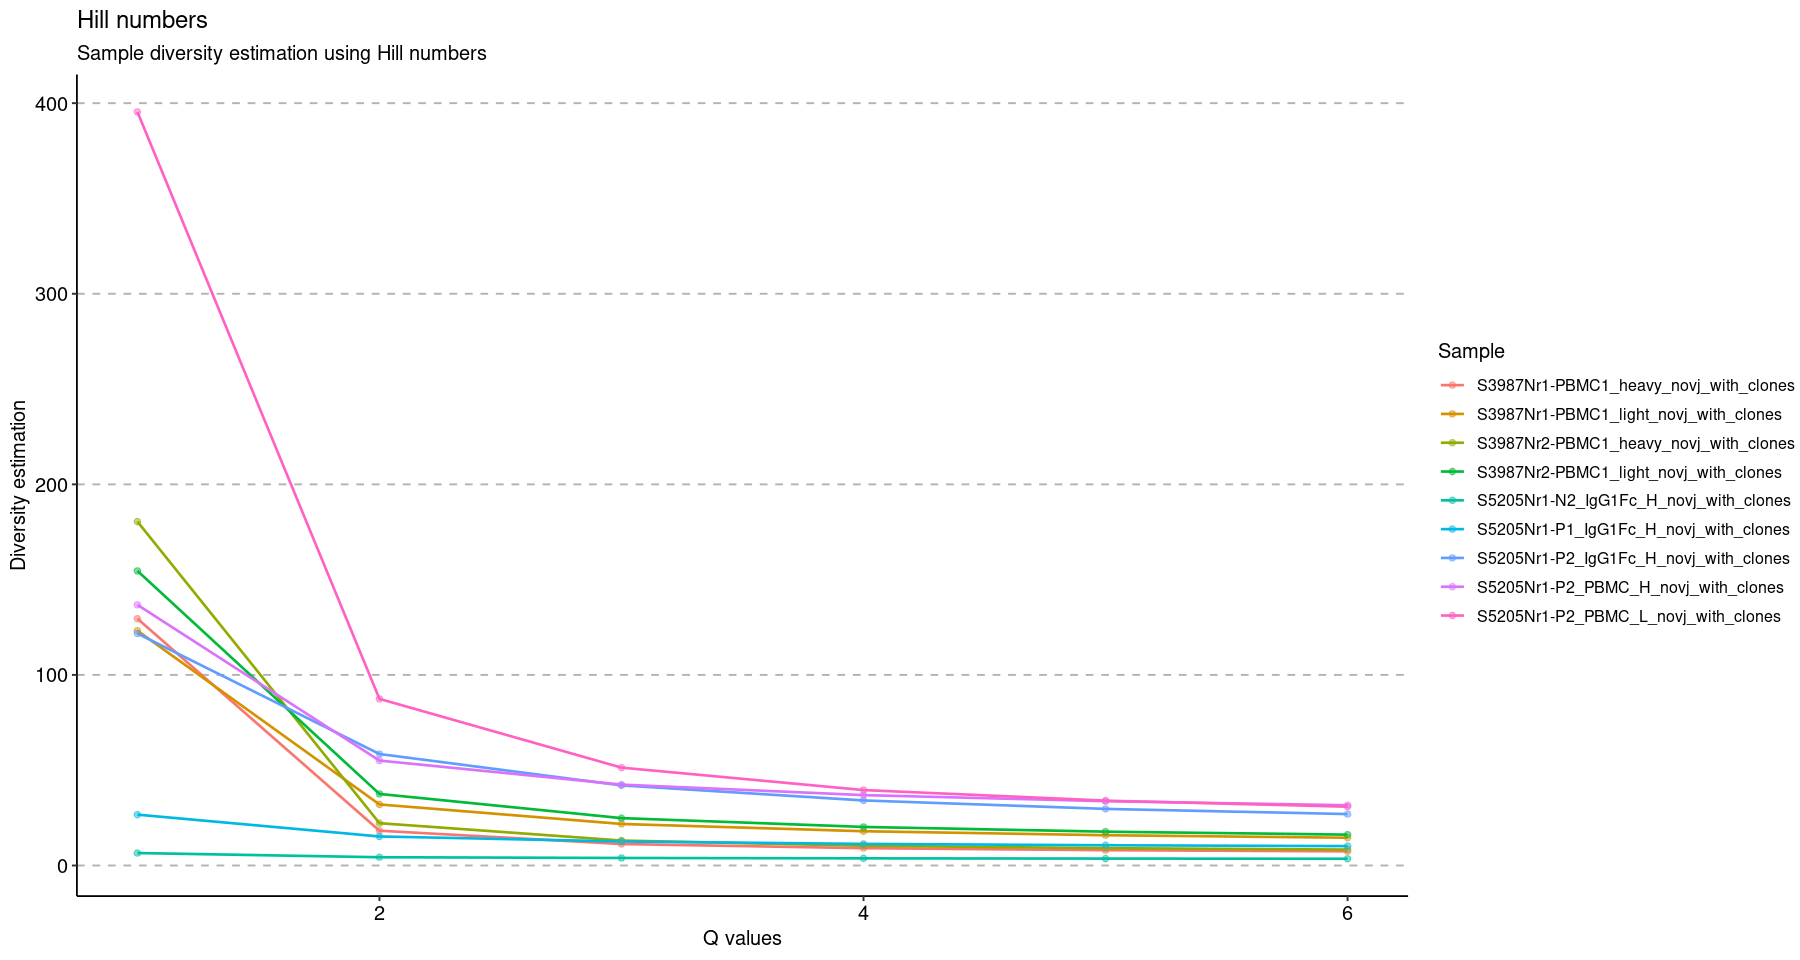

In [17]:
# Compute statistics and visualise them
# Chao1 diversity measure
div_chao <- repDiversity(repertoires$data, "chao1")

# Hill numbers
div_hill <- repDiversity(repertoires$data, "hill")

# D50
div_d50 <- repDiversity(repertoires$data, "d50")

# Ecological diversity measure
div_div <- repDiversity(repertoires$data, "div")

p1 <- vis(div_chao)
p2 <- vis(div_hill)
p3 <- vis(div_d50)
p4 <- vis(div_div)

p2

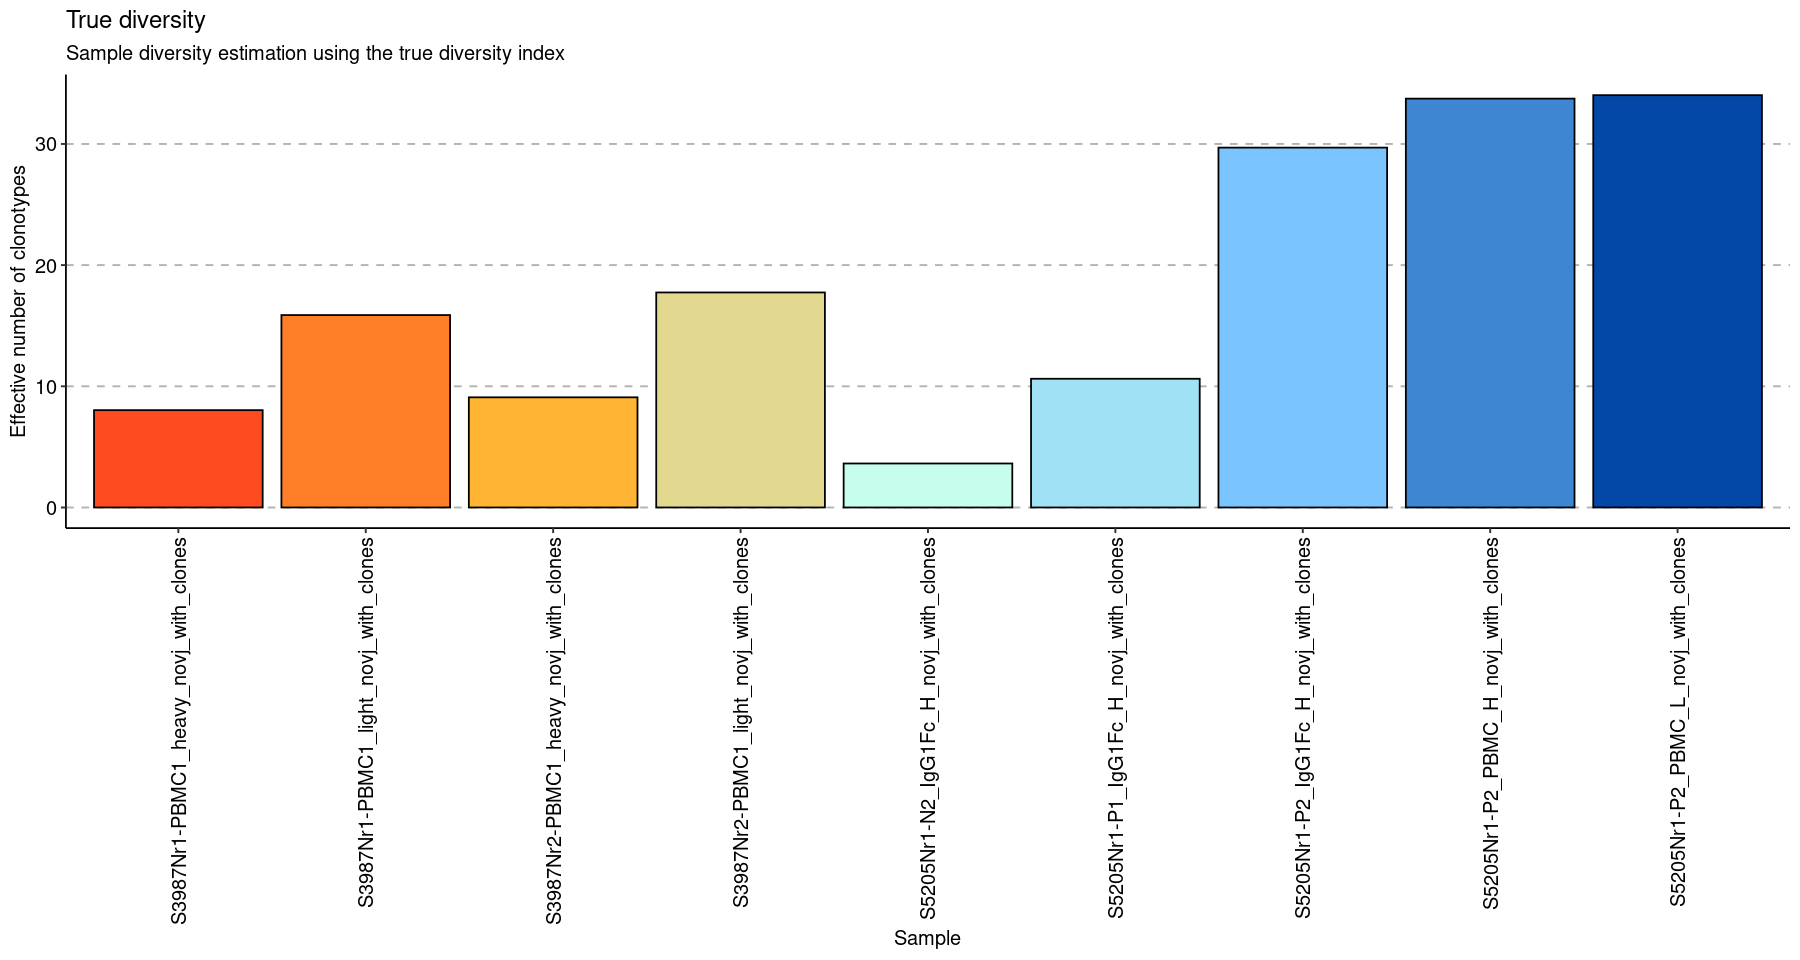

In [20]:
# p1
# p2
# p3
# p4

In [21]:
imm_raref <- repDiversity(repertoires$data, "raref", .verbose = F)

p1 <- vis(imm_raref)
# p2 <- vis(imm_raref, .by = "Status", .meta = immdata$meta)

p1

ERROR: Error in if (Sest[1] == Sobs) {: missing value where TRUE/FALSE needed
